<a href="https://colab.research.google.com/github/busung/machine-learning-practice/blob/main/KNN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%8F%84%EB%AF%B8%EC%99%80_%EB%B9%99%EC%96%B4_%EB%B6%84%EB%A5%98_part2(%EC%86%8C%EC%9B%A8%EC%9C%B5_3%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도미와 빙어 분류

## 데이터 생성

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]

In [3]:
fish_data[:3]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0]]

In [4]:
fish_target = [1]*35+[0]*14

## 데이터셋 분리

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target)

## 학습


In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input,train_target)

KNeighborsClassifier()

## 평가

In [9]:
kn.score(test_input,test_target)

1.0

In [10]:
kn.predict(test_input)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [11]:
test_target

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

## 스케일(표준화)
* 단위를 통일 시키는 것이 목표
* 2번째 그래프를 보면 단위 즉 lim을 통일 시키면 y축만 영향이 큰 것을 알 수 있다
* Weight의 scale은 큰데 length의 scale은 작음 즉 단위가 다르기에 이런 현상이 발생
* 이를 해결하기 위하여 표준화를 진행

In [17]:
import numpy as np
np_train_input = np.array(train_input)
np_test_input = np.array(test_input)
np_train_target = np.array(train_target)
np_test_target = np.array(test_target)


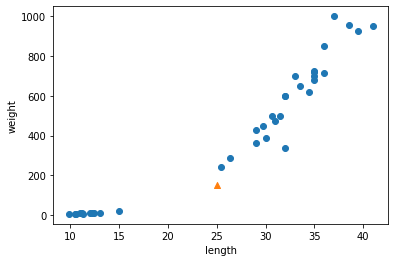

In [18]:
import matplotlib.pyplot as plt
# 그래프 상에선 도미 같은데 predict은 빙어로 나옴
plt.scatter(np_train_input[:,0], np_train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [23]:
kn.predict([[25,150]])

array([0])

In [24]:
distances, indexes = kn.kneighbors([[25, 150]])

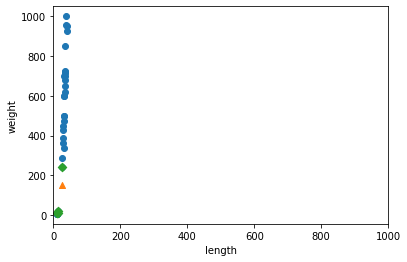

In [25]:
plt.scatter(np_train_input[:,0], np_train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(np_train_input[indexes,0], np_train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
mean = np.mean(np_train_input,axis=0)
std = np.std(np_train_input,axis=0)

In [31]:
train_scaled=(np_train_input-mean)/std

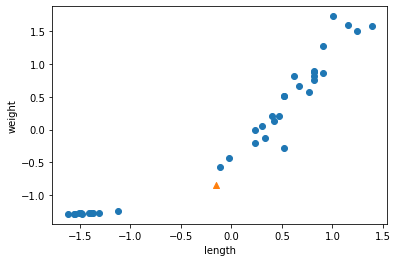

In [33]:
new = ([25,150]-mean) / std
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()